In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns



In [42]:
map_df = gpd.read_file("./file/Indian_States.shp")
df = pd.read_csv("./child-crime.csv")
cyber_data  = pd.read_csv("cyber-crime.csv")
cac_data = pd.read_csv("./CAC_T.csv")
illiterates_data = pd.read_csv("./Illiteracy-rate.csv")
enrolment_data = pd.read_csv("./enrolment.csv")



df.rename({"States/UTs": "state", "Crime Head": "crime", "2014": "numberOfCrimes"}, axis=1, inplace=True)
df["year"]  = pd.Series([2014 for x in range(len(df.index))])

In [43]:
statesAndUts = df["state"].unique()

In [44]:
total_crimes = []
for i in range (0, len(statesAndUts) - 1):
    total =  df.loc[df['state'] == statesAndUts[i], 'numberOfCrimes'].sum()
    total_crimes.append([statesAndUts[i], total])

t_df = pd.DataFrame(total_crimes, columns = ['State/UTs','no_of_crimes'])
t_df.to_csv("crime.csv")


CRIME AGAINST CHILDREN IN INDIA.


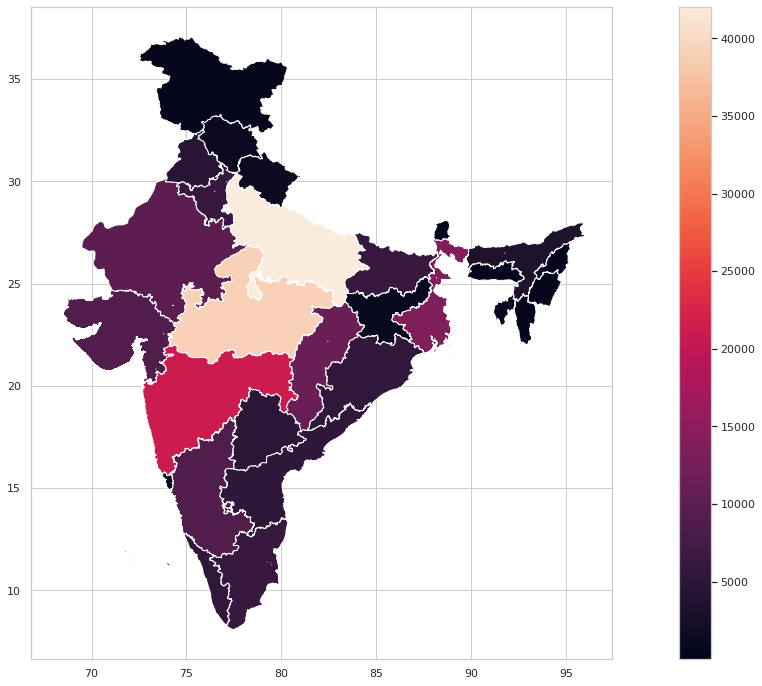

In [45]:
map_df.rename(columns = {'st_nm':'States/UTs'}, inplace = True)
merged_df = map_df.set_index('States/UTs').join(t_df.set_index('State/UTs')) 
print("CRIME AGAINST CHILDREN IN INDIA.")
merged_df.plot('no_of_crimes', figsize = (24, 12), legend = True)
plt.savefig("overall-crime.png")


In [46]:
def compute_mode(line_object):
    x = line_object.get_xdata()
    y = line_object.get_ydata()
    mode_idx = y.argmax()
    return x[mode_idx], y[mode_idx]

In [47]:
cac_cols = cac_data.columns

In [48]:
# def make_density(layer_list, color, col):
#     # Draw the histogram and fit a density plot.
#     ax = sns.histplot(layer_list, kde=True, bins=25,
#                       color=color)
#     # compute mode of the histogram.
#     mode_x, mode_y = compute_mode(ax.lines[0])

#     # draw a vertical line at the mode of the histogram.
#     ax.text(mode_x, mode_y, 'mode: {:.4f}'.format(mode_x))
#     # Plot formatting
#     ax.set_xlabel(col)
#     ax.set_ylabel('Density')

# for i in range(1, len(cac_cols) - 1):
#     make_density(cac_data[cac_cols[i]], 'green', cac_cols[i])
#     plt.show()

In [49]:
cyber_states = cyber_data["State/UT (Col. 2)"]
total_crime_state_wise  = cyber_data.sum(axis=1, numeric_only=True)
total_cyber_crimes = pd.DataFrame(list(zip(cyber_states, total_crime_state_wise)), columns =['state', 'total_crime']) 
total_cyber_crimes


,state,total_crime
0,Andhra Pradesh,104
1,Arunachal Pradesh,0
2,Assam,90
3,Bihar,2
4,Chhattisgarh,42
5,Goa,6
6,Gujarat,64
7,Haryana,66
8,Himachal Pradesh,38
9,Jharkhand,8


CYBER CRIME IN INDIA


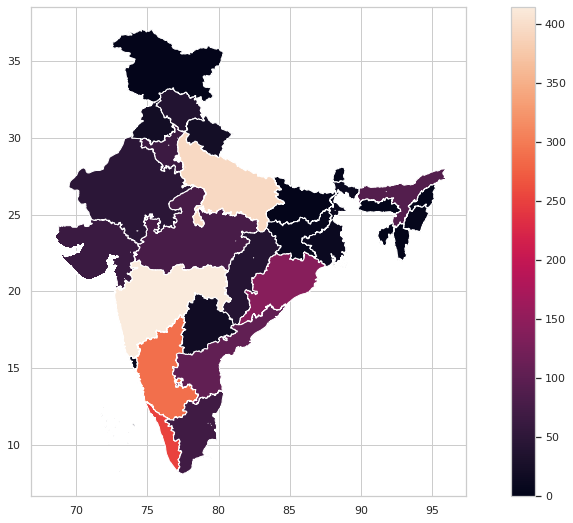

In [50]:
merged_df = map_df.set_index('States/UTs').join(total_cyber_crimes.set_index('state')) 
print("CYBER CRIME IN INDIA")
merged_df.plot('total_crime', figsize = (16, 9), legend = True)
plt.savefig("overall.png")


Literacy reate in INDIA


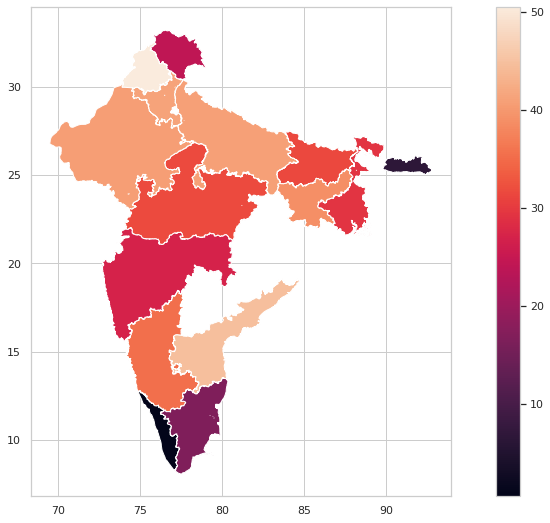

In [51]:
merged_df = map_df.set_index('States/UTs').join(illiterates_data.set_index('States')) 
print("Literacy reate in INDIA")
merged_df.plot('Illiterates (in percent)', figsize = (16, 9), legend = True)
plt.savefig("literacy.png")


Literacy rate for primary students in INDIA


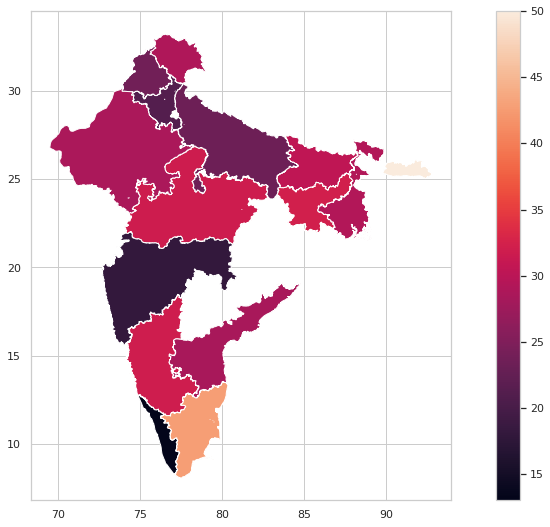

In [52]:
print("Literacy rate for primary students in INDIA")
merged_df.plot('Primary(in percent)', figsize = (16, 9), legend = True)
plt.savefig("primary.png")


Literacy rate for middle students in INDIA


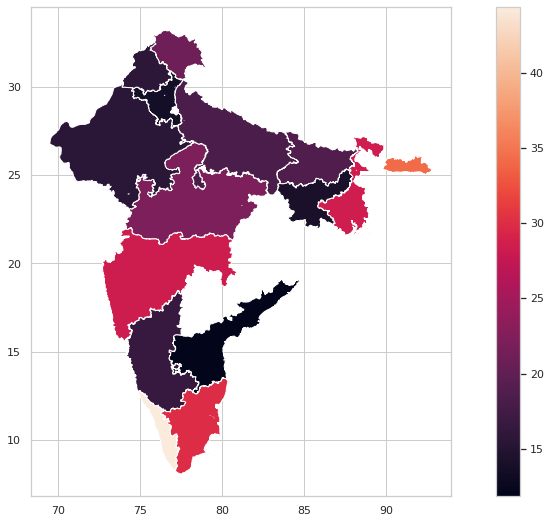

In [53]:
print("Literacy rate for middle students in INDIA")
merged_df.plot('Middle (in percent)', figsize = (16, 9), legend = True)
plt.savefig("middle.png")


Literacy rate for above metrics students in INDIA


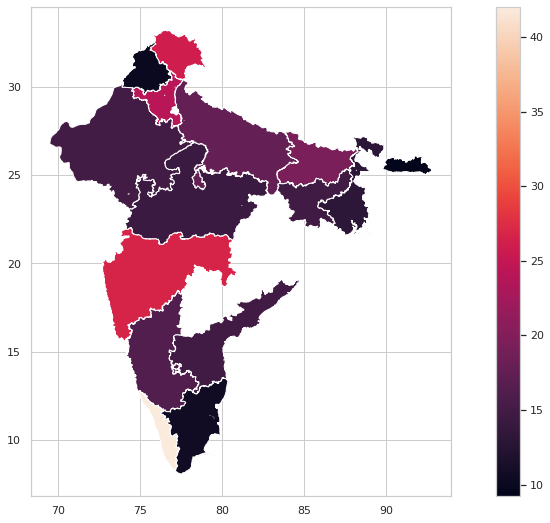

In [54]:
print("Literacy rate for above metrics students in INDIA")
merged_df.plot('Matric & Above (in percent)', figsize = (16, 9), legend = True)
plt.savefig("above-metric.png")


In [55]:

enrolment_states = enrolment_data["state_name"].unique()
state_wise_girls_enrolment = []
state_wise_enrollment = []

for i in range(0, len(enrolment_states)):
    class1girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_1_girls'].sum()
    class2girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_2_girls'].sum()
    class3girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_3_girls'].sum()
    class4girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_4_girls'].sum()
    class5girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_5_girls'].sum()
    class6girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_6_girls'].sum()
    class7girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_7_girls'].sum()
    class8girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_8_girls'].sum()
    class9girls =  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_9_girls'].sum()



    class1 =  class1girls + enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_1_boys'].sum()
    class2 = class2girls + enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_2_boys'].sum()
    class3 =  class3girls + enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_3_boys'].sum()
    class4 = class4girls + enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_4_boys'].sum()
    class5 = class5girls + enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_5_boys'].sum()
    class6 = class6girls +  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_6_boys'].sum()
    class7 = class7girls +  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_7_boys'].sum()
    class8 = class8girls +  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_8_boys'].sum()
    class9 = class9girls +  enrolment_data.loc[enrolment_data['state_name'] == enrolment_states[i], 'class_9_boys'].sum()

    state_wise_girls_enrolment.append([enrolment_states[i], class1girls, class2girls, class3girls, class4girls, class5girls, class6girls, class7girls, class8girls, class9girls])
    state_wise_enrollment.append([enrolment_states[i], class1, class2, class3, class4, class5, class6, class7, class8, class9])

state_wise_girls_enrolment_df = pd.DataFrame(state_wise_girls_enrolment, columns = ['states', 'class1girls','class2girls', 'class3girls', 'class5girls', 'class4girls', 'class6girls', 'class7girls', 'class8girls', 'class9girls'])
state_wise_enrolment_df = pd.DataFrame(state_wise_enrollment, columns = ['states', 'class1','class2', 'class3', 'class5', 'class4', 'class6', 'class7', 'class8', 'class9'])


state_wise_girls_enrolment_df.to_csv("state_wise_girls_enrolment.csv")
state_wise_enrolment_df.to_csv("state_wise_enrolment.csv")

In [56]:
t  = state_wise_girls_enrolment_df.sum(axis=1, numeric_only=True) 
state_wise_girls = pd.DataFrame(list(zip(enrolment_states, t)), columns =['states', 'total_girls_enrolled']) 


t2  = state_wise_enrolment_df.sum(axis=1, numeric_only=True) 
state_wise_enrolled = pd.DataFrame(list(zip(enrolment_states, t2)), columns =['states', 'total_enrolled']) 



state_wise_enrolled

,states,total_enrolled
0,Jammu & Kashmir,1840166
1,Himachal Pradesh,1040317
2,Punjab,4255192
3,Chandigarh,182890
4,Uttarakhand,1847217
5,Haryana,4532313
6,Delhi,3393236
7,Rajasthan,13678095
8,Uttar Pradesh,37748898
9,Bihar,21391954


FOR ALL ENROLLED GIRLS


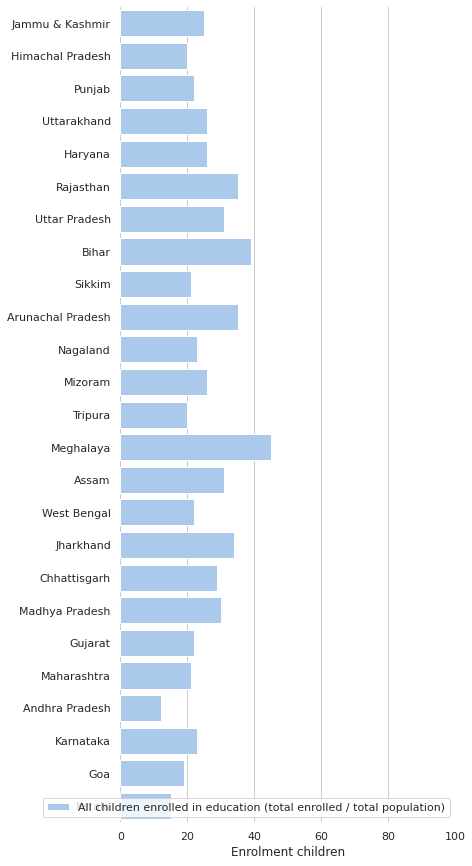

In [57]:
state_wise_population = pd.read_csv("./population-state-wise.csv")
remove_delimiter = state_wise_population["population"].str.replace(",", "")
remove_delimiter2 = state_wise_population["states"].str.replace("#", "")

state_wise_population["population"] = remove_delimiter
state_wise_population["states"] = remove_delimiter2

total_enrolled_in_percentage = []

for i in range(0, len(state_wise_girls["states"]) - 1):
    for j in range(0, len(state_wise_population) - 1):
        if state_wise_enrolled["states"][i].lower() == state_wise_population["states"][j].lower():
            total_enrolled_percentage_of_a_state = ((float(state_wise_enrolled["total_enrolled"][i]) / float(state_wise_population["population"][j])) * 100)
            total_enrolled_in_percentage.append([state_wise_enrolled["states"][i],  int(total_enrolled_percentage_of_a_state) ])


total_enrolled_in_percentage_df = pd.DataFrame(total_enrolled_in_percentage, columns=["states", "enrolled_percentage"])
total_enrolled_in_percentage_df


sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
print("FOR ALL ENROLLED GIRLS")
sns.barplot(x="enrolled_percentage", y="states", data=total_enrolled_in_percentage_df,  label="All children enrolled in education (total enrolled / total population)", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Enrolment children")
sns.despine(left=True, bottom=True)

Children enrolment for education across country


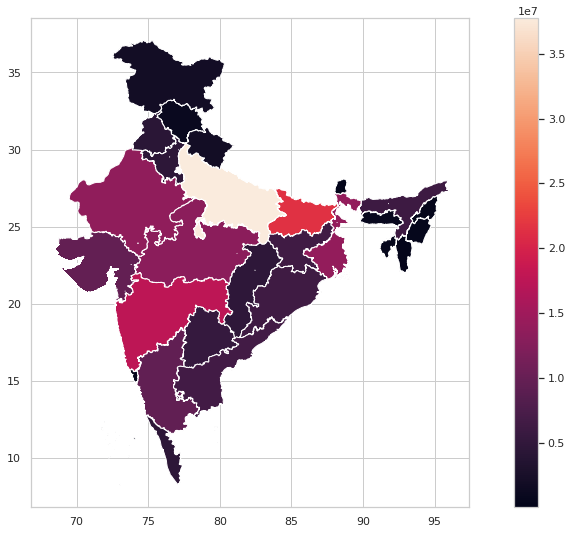

In [58]:
merged_df = map_df.set_index('States/UTs').join(state_wise_enrolled.set_index('states')) 
print("Children enrolment for education across country")
merged_df.plot('total_enrolled', figsize = (16, 9), legend = True)
plt.savefig("total-enrolled.png")

FOR ALL ENROLLED GIRLS


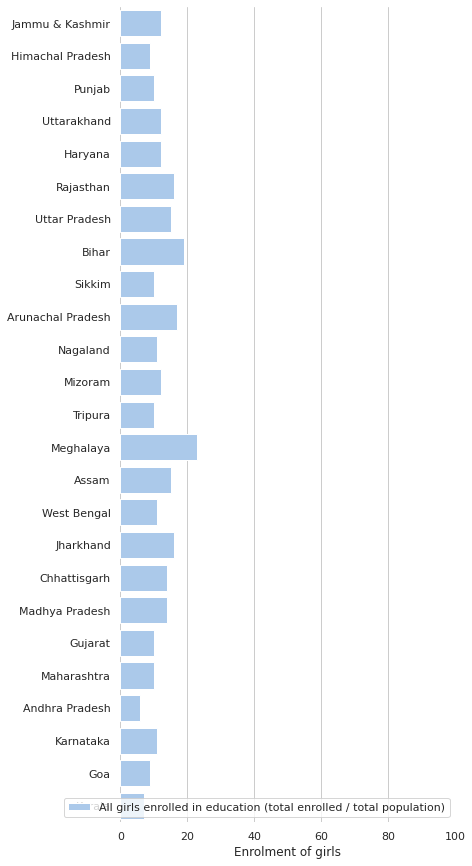

In [59]:
state_wise_population = pd.read_csv("./population-state-wise.csv")
remove_delimiter = state_wise_population["population"].str.replace(",", "")
remove_delimiter2 = state_wise_population["states"].str.replace("#", "")

state_wise_population["population"] = remove_delimiter
state_wise_population["states"] = remove_delimiter2

girl_enrolled_in_percentage = []

for i in range(0, len(state_wise_girls["states"]) - 1):
    for j in range(0, len(state_wise_population) - 1):
        if state_wise_girls["states"][i].lower() == state_wise_population["states"][j].lower():
            girls_percentage_of_a_state = ((float(state_wise_girls["total_girls_enrolled"][i]) / float(state_wise_population["population"][j])) * 100)
            girl_enrolled_in_percentage.append([state_wise_girls["states"][i],  int(girls_percentage_of_a_state) ])


girl_enrolled_in_percentage_df = pd.DataFrame(girl_enrolled_in_percentage, columns=["states", "girls_enrolled_percentage"])
girl_enrolled_in_percentage_df


sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
print("FOR ALL ENROLLED GIRLS")
sns.barplot(x="girls_enrolled_percentage", y="states", data=girl_enrolled_in_percentage_df,  label="All girls enrolled in education (total enrolled / total population)", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Enrolment of girls")
sns.despine(left=True, bottom=True)

Girls enrolment for education accross country


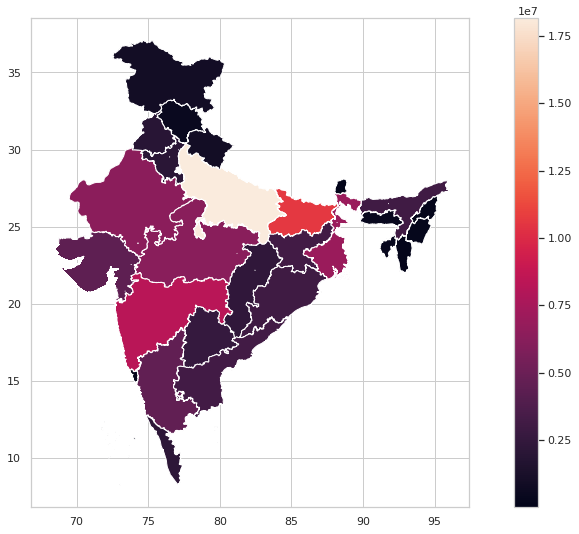

In [60]:
merged_df = map_df.set_index('States/UTs').join(state_wise_girls.set_index('states')) 
print("Girls enrolment for education accross country")
merged_df.plot('total_girls_enrolled', figsize = (16, 9), legend = True)
plt.savefig("girls-enrolled.png")


In [62]:
literacy_2011 = pd.read_csv("./literacy_rate_2011.csv")

data = literacy_2011.drop(columns=["1951", "1961", "1971", "1981", "1991", "2001"])
data.rename({"State/ UTs": "state"}, axis=1, inplace=True)

merged_df = map_df.set_index('States/UTs').join(data.set_index('state')) 
print("Literacy rate IN INDIA.")
merged_df.plot('2011', figsize = (24, 12), legend = True)
plt.savefig("literacy.png")

,state,2011
0,Andaman and Nicobar Islands,86.6
1,Andhra Pradesh,67.0
2,Arunachal Pradesh,65.4
3,Assam,72.2
4,Bihar,61.8
5,Chandigarh,86.0
6,Chhattisgarh,70.3
7,Dadra and Nagar Haveli,76.2
8,Daman and Diu,87.1
9,Delhi,86.2


Literacy rate IN INDIA.


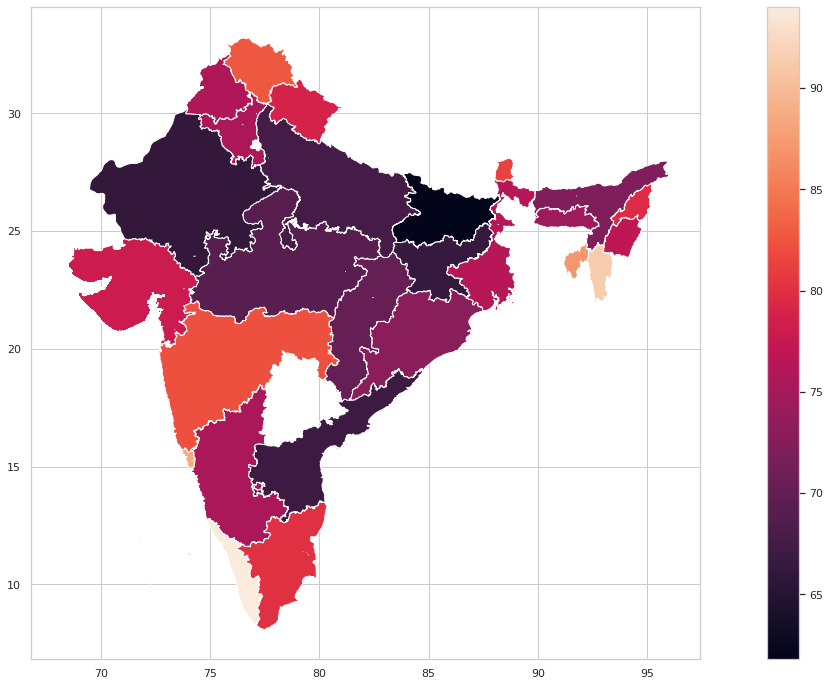